<a href="https://colab.research.google.com/github/RogerioSFFilho/ProjetosT-D/blob/main/An%C3%A1lise_RFM_de_Clientes_em_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Dados**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

caminho = '/content/drive/MyDrive/BasesDados/customer_dataset.csv'
df = pd.read_csv(caminho)

display(df)

display(pd.DataFrame({'Total de clientes': [len(df)]}))

resumo = pd.DataFrame({
    'Tipo': df.dtypes,
    'Valores Nulos': df.isnull().sum(),
    'Valores Únicos': df.nunique()
})
display(resumo)

,customer_id,favorite_category,acquisition_channel,first_purchase_date,total_orders,total_spent,last_purchase_date,returns_count,avg_order_value,days_since_last_purchase,customer_lifetime_months
0,CUST0001,Tablets,Google,16/11/2022,10,17302,25/03/2024,0,1730,124,20
1,CUST0002,Games,Google,18/04/2023,21,18160,21/07/2024,0,865,6,15
2,CUST0003,Tablets,Orgânico,10/01/2023,16,7309,30/04/2024,0,457,88,18
3,CUST0004,Audio,Facebook,11/08/2022,7,7844,16/04/2024,1,1121,101,23
4,CUST0005,Acessórios,Facebook,15/10/2023,5,1075,08/09/2023,2,215,323,9
5,CUST0006,Acessórios,Indicação,02/05/2024,1,2100,18/06/2024,1,2100,39,2
6,CUST0007,Tablets,Email,17/02/2023,5,4597,01/03/2024,1,919,148,17
7,CUST0008,Tablets,Email,30/10/2023,19,8982,16/06/2024,1,473,41,8
8,CUST0009,Games,Google,11/03/2024,6,2014,09/04/2024,0,336,109,4
9,CUST0010,Audio,Orgânico,06/05/2023,32,17626,16/07/2024,0,551,11,14


,Total de clientes
0,35


,Tipo,Valores Nulos,Valores Únicos
customer_id,object,0,35
favorite_category,object,0,6
acquisition_channel,object,0,5
first_purchase_date,object,0,35
total_orders,int64,0,22
total_spent,int64,0,35
last_purchase_date,object,0,34
returns_count,int64,0,4
avg_order_value,int64,0,34
days_since_last_purchase,int64,0,34


#**Outliers - Analise Inicial**

/tmp/ipython-input-974841815.py:31: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  x1, y1 = int(outlier1['total_orders']), int(outlier1['total_spent'])
/tmp/ipython-input-974841815.py:32: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  x2, y2 = int(outlier2['total_orders']), int(outlier2['total_spent'])


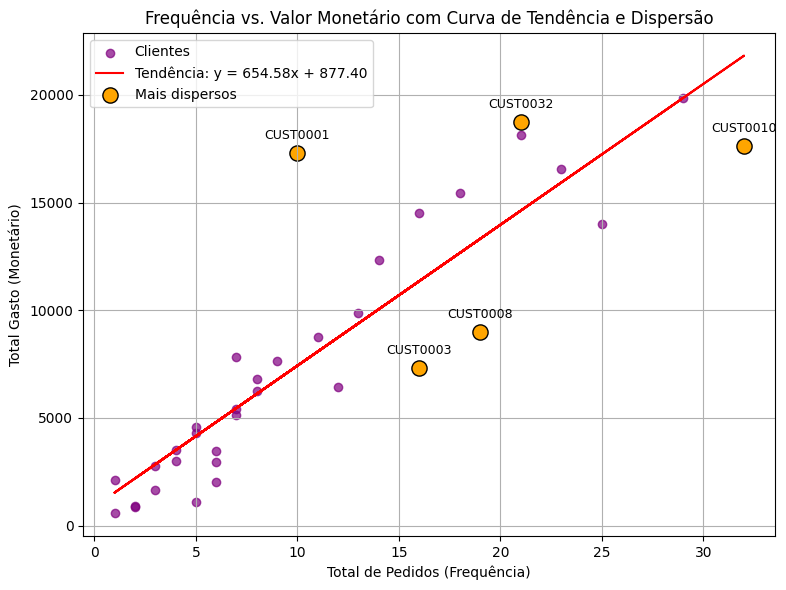

In [4]:
x = df['total_orders']
y = df['total_spent']

plt.figure(figsize=(8,6))
plt.scatter(x, y, color='purple', alpha=0.7, label='Clientes')

# Reta de regressão linear
a, b = np.polyfit(x, y, 1)  # y = a*x + b
plt.plot(x, a*x + b, color='red', label=f'Tendência: y = {a:.2f}x + {b:.2f}')

# Dispersão dos pontos
df['y_pred'] = a * x + b
df['dispersao'] = abs(y - df['y_pred'])

# Top 5 clientes mais dispersos da tendência
top_dispersos = df.sort_values('dispersao', ascending=False).head(5)

# Destacar os pontos mais dispersos no gráfico
plt.scatter(top_dispersos['total_orders'], top_dispersos['total_spent'],
            color='orange', edgecolors='black', s=120, label='Mais dispersos')

# Os 5 mais dispersos
for _, row in top_dispersos.iterrows():
    plt.annotate(row['customer_id'],
                 (row['total_orders'], row['total_spent']),
                 textcoords="offset points", xytext=(0,10), ha='center', fontsize=9)

# Anotar os dois outliers de maior frequência e maior gasto
outlier1 = df[df['total_orders'] == df['total_orders'].max()]  # mais pedidos
outlier2 = df[df['total_spent'] == df['total_spent'].max()]    # maior gasto
x1, y1 = int(outlier1['total_orders']), int(outlier1['total_spent'])
x2, y2 = int(outlier2['total_orders']), int(outlier2['total_spent'])


plt.title("Frequência vs. Valor Monetário com Curva de Tendência e Dispersão")
plt.xlabel("Total de Pedidos (Frequência)")
plt.ylabel("Total Gasto (Monetário)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [5]:
outliers = df.sort_values('dispersao', ascending=False).head(5)

outliers_cols = ['customer_id','favorite_category','total_orders',
                 'total_spent','avg_order_value','days_since_last_purchase','customer_lifetime_months']

display(outliers[outliers_cols])

,customer_id,favorite_category,total_orders,total_spent,avg_order_value,days_since_last_purchase,customer_lifetime_months
0,CUST0001,Tablets,10,17302,1730,124,20
7,CUST0008,Tablets,19,8982,473,41,8
9,CUST0010,Audio,32,17626,551,11,14
31,CUST0032,Games,21,18765,893,10,17
2,CUST0003,Tablets,16,7309,457,88,18


<details>
<summary><strong>Análise Outliers</strong></summary>
No gráfico de disperção acima, vemos claramente uma correlação positiva: de modo geral, clientes com mais pedidos tendem a ter um total gasto maior (os pontos sobem conforme vamos para a direita). Isso é esperado, já que cada pedido adiciona mais gastos. A linha de tendência seria ascendente. De fato, calculando quantitativamente, a **Correlação de Pearson**💬 entre total_orders e total_spent é ≈ 0,89, indicando forte correlação linear.

Porém, dos 35 clientes podemos observar que 5 como estão destacados são outliers, deles vemos algumas particularidades como as dos clientes com os ids CUST0010 e CUST001 que apezar de terem o numero de pedidos muito diferentes tem o valor gasto muito próximo, o que se justifica pelo ticket médio de suas compras 1730 para um enquanto o outro tem 551, o que justifica dizer que a quantidade de compras não é o unico fator relevante para o valor total, o valor de cada compra também importa.

Outros Outliers notaveis além dos que estão fora da curva de dispersão são os que se encontram em suas pontas como o CUST0019, CUST0031 e o CUST0006.O da ponta de cima(CUST0019) pode nos indicar o que chamamos de Campeões, a principio devemos encarar apenas como uma hipotese porque devemos levar em consideração também a recencia dessas compras na analise final do modelo RFV, porém já temos um bom indicativo disso. Já os outros dois estão apontados a principio para o grupo de Risco que deve ser olhada de forma mais próxima para mitigar a possível perda desses cliente.
</details>

#**Analise de Tendencias**

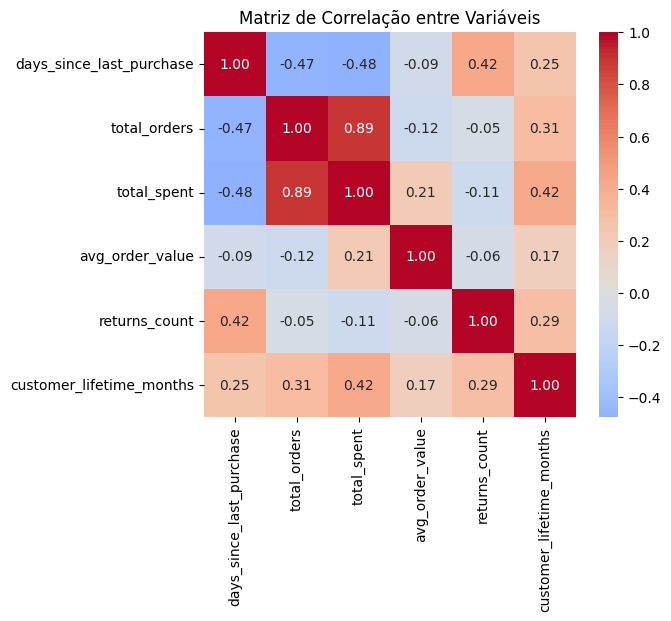

In [6]:
# Selecionar colunas numéricas relevantes
numeric_cols = ['days_since_last_purchase', 'total_orders', 'total_spent',
                'avg_order_value', 'returns_count', 'customer_lifetime_months']
corr_matrix = df[numeric_cols].corr()

# Plotar heatmap de correlação
plt.figure(figsize=(6,5))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", center=0)
plt.title("Matriz de Correlação entre Variáveis")
plt.show()

<

<details>
<summary><strong>Análise de Tendência</strong></summary> **negrito**

**Pontos chaves a entender com a matriz de correlação para encontrar tendencias(Lembrando que databases pequenos podem distorcer os resultados, feito com intuito de treinamento):**

*   **Total Gasto x Total de Pedidos**
##### Essa é a maior correlação do modelo 0,89 positiva, ou seja quem compra com mais frequencia tem a tendencia de gastar mais e vice-versa. Isso é intuituivo, porém pode ser quebrado no caso de compras de frequencia mas de baixo valor. Para o negócio isso mostra a necessidade da apresentação de novos produtos com maior valor para clientes de ticket baixo afim de manter essa lógica.


*   **Ultima Compra x Total de Pedidos/Total Gasto**
##### Ultima Compra tem relação moderada e negativa com Total de Pedidos e com Total Gasto(-0,47; -0,48), isso nos da um indicativo legal de que os clientes que compraram mais e gastaram mais tendem a ter realizado suas compras recentemente.

*   **Tempo da primeira compra(meses) x Total de Pedidos/Total Gasto**
##### Tempo em meses desde a primeira compra tem correlação positiva moderada com Total de Pedidos e Total de Gastos, sendo mais forte 0,42 com o gasto total, isso mostra que apesar de ter uma correlação hoje entre o tempo em que o cliente conhece os produtos com o total que ele gasta, existe uma sobra onde uma boa estratégia pode converter em mais compras de todos os clientes ao longo do tempo.

*   **Devoluções**
##### Vemos correlação positiva moderada (0,42) entre returns_count e days_since_last_purchase. Curiosamente, isso nos da a entender que clientes que fizeram devoluções tendem a estar há mais tempo sem comprar. Pode ser que seja apenas coincidência visto o dataset pequeno, mas faz sentido pensar: uma experiência de compra ruim pode reduzir a chance de o cliente comprar novamente em curto prazo (podendo levá-lo a churn). Por outro lado, returns_count tem correlação fraca com total_spent (~-0.11) e quase neutra com total_orders. Ou seja, clientes que mais devolvem não necessariamente gastaram menos no total ou compraram menos vezes – mas possivelmente estão mais “distantes” da empresa agora. Esse insight apontaria para investigar qualitativamente se problemas de devoluções esta causando perda de clientes, e pensar em ações de reconquista ou melhoria do atendimento pós-venda.

**Resumindo das tendencias: Clientes “bons” tendenciam a pontuar bem em todos os quesitos (recência baixa, frequência alta, valor alto), enquanto clientes fracos o contrário. Isso realça a necessidade da análise RFM – combinar essas dimensões nos permitirá segmentar clientes de forma útil. A próxima etapa é exatamente segmentar os clientes com base em RFM, utilizando critérios objetivos.**
</details>

#Segmentação de Clientes via RFV

<details>
<summary><strong>Tipos de segmentação</strong></summary>
Depois de entender melhor os dados agora vamos criar segmentos de clientes por RFV. Ela pode ser feita de diversas maneiras diferentes. Aqui vão as duas principais abordagens.



<ul style="margin-left: 30px;">
  <details>
  <summary><strong>Segmentação RFV por Pontuação(Quantis):</strong></summary>
    Uma das maneiras mais tradicionais é transformar cada uma das metricras R,F e V em scores que vão de 1 a 5 baseda em quantis ou percentis, assim combinando para classificar, por exemplo, clientes. A classificação vem da seguinte maneira, 1(baixo) a 5(alto), para cada uma das variaveis RFV(Recência, Frequência e Valor Monetário), e a junção desses valores viram o rotulo do cliente. ex: 5,5,5 seria o melhor e 1,1,1 o pior.
  </details>
</ul>

<ul style="margin-left: 30px;">
  <details>
  <summary><strong>Segmentação RFV por CLusterização(K-means):</strong></summary>
    Outra maneira de abordar os dados RFV é a aplicação de algoritimos de clustering para agrupar clientes com padrões semelhantes de forma automatica. O exemplo que vou usar é o K-means para descobrir grupos no Espaço R-F-V, a vantagem é que o algoritmo define os grupos com base na semelhança entres os dados aprensetados, o que trás a possíbilidade de encontrar o que é chamado de segmentos "naturais". A desvantagem é a dificuldade de escalar para um numero elevado de dados e também a problematica quanto a menor interpretabilidade dos dados, além de depender da escolha do número de clusters.    
  </details>
</ul>

## **Pontuação RFV por Quantis**

Usaremos a escala {1,2,3,4,5} para cada uma das três dimenções R,F e V. Como o dataset é pequeno usar 5 grupos pode resultar em grupos pequenos, mas servira para ilustrar a abordagem.

*importante* - *No cálculo do escore de Recência a lógica tem que ser inversa, pois quanto menor o valor númerico maior deve ser a nota*


In [7]:
rfv = df.copy()

rfv['R_score'] = pd.qcut(rfv['days_since_last_purchase'], q=5, labels=[5,4,3,2,1])
rfv['F_score'] = pd.qcut(rfv['total_orders'], q=5, labels=[1,2,3,4,5])
rfv['V_score'] = pd.qcut(rfv['total_spent'], q=5, labels=[1,2,3,4,5])

rfv[['R_score','F_score','V_score']] = rfv[['R_score','F_score','V_score']].astype(int)

display(rfv[['customer_id','days_since_last_purchase','total_spent','total_orders','R_score','F_score','V_score']].head(10))

,customer_id,days_since_last_purchase,total_spent,total_orders,R_score,F_score,V_score
0,CUST0001,124,17302,10,2,3,5
1,CUST0002,6,18160,21,5,5,5
2,CUST0003,88,7309,16,3,4,3
3,CUST0004,101,7844,7,2,3,4
4,CUST0005,323,1075,5,1,2,1
5,CUST0006,39,2100,1,3,1,1
6,CUST0007,148,4597,5,2,2,2
7,CUST0008,41,8982,19,3,5,4
8,CUST0009,109,2014,6,2,2,1
9,CUST0010,11,17626,32,4,5,5


Depois de calcular os scores com a função do pandas qcut que divide de forma igual(próximo a 20% no caso) as variaveis em um número q(5) de grupos, cada cliente agora terá 3 avaliações uma pra cada métrica em RFV. A combinação escolhida primeiramente para a metrica final foi a de soma, me parece mais simples no sentido de que facilita a segmentação por categorias (alto, médio, baixo).
DEFINIÇÃO DAS CATEGORIAS:
3-7 = Baixo valor, 8-11 = Médio, 12-15 = Alto valor

In [8]:
rfv['RFV_sum'] = rfv['R_score'] + rfv['F_score'] + rfv['V_score']
rfv['RFV_segment'] = pd.cut(rfv['RFV_sum'], bins=[2,7,11,15], labels=['Baixo','Médio','Alto'])
rfv['RFV_segment'] = pd.Categorical(
    rfv['RFV_segment'],
    categories=['Baixo', 'Médio', 'Alto'],
    ordered=True
)


display(rfv['RFV_segment'].value_counts().sort_index())

,count
RFV_segment,
Baixo,16
Médio,7
Alto,12


Vemos que temos aproximadamente 34% dos clientes como de alto valor, 20% no nível médio e a maior parte de 46% no baixo valor. Em sentido de negócios isso acende um alerta de que a retenção dos clientes está com um problema.
Por conta disso é importante agora abrir a pontuação de cada uma das métricas de cada cliente para ter uma visão mais detalhada de cada cliente dentro dos grupos para entender a melhor maneira de atacar cada grupo especifico.

In [9]:
top_clients = rfv[rfv['RFV_segment']=='Alto']
mid_clients = rfv[rfv['RFV_segment']== 'Médio']
low_clients = rfv[rfv['RFV_segment']=='Baixo']

display("Alto valor", top_clients[['customer_id','R_score','F_score','V_score','RFV_sum']])
display("Médio Valor", low_clients[['customer_id','R_score','F_score','V_score','RFV_sum']])
display("Baixo valor", low_clients[['customer_id','R_score','F_score','V_score','RFV_sum']])

'Alto valor'

,customer_id,R_score,F_score,V_score,RFV_sum
1,CUST0002,5,5,5,15
7,CUST0008,3,5,4,12
9,CUST0010,4,5,5,14
12,CUST0013,5,5,4,14
16,CUST0017,4,4,4,12
18,CUST0019,5,5,5,15
21,CUST0022,4,4,4,12
23,CUST0024,5,5,5,15
26,CUST0027,5,4,4,13
28,CUST0029,5,4,5,14


'Médio Valor'

,customer_id,R_score,F_score,V_score,RFV_sum
4,CUST0005,1,2,1,4
5,CUST0006,3,1,1,5
6,CUST0007,2,2,2,6
8,CUST0009,2,2,1,5
11,CUST0012,1,1,2,4
13,CUST0014,3,1,2,6
15,CUST0016,4,1,1,6
17,CUST0018,1,2,2,5
19,CUST0020,4,1,1,6
20,CUST0021,1,3,3,7


'Baixo valor'

,customer_id,R_score,F_score,V_score,RFV_sum
4,CUST0005,1,2,1,4
5,CUST0006,3,1,1,5
6,CUST0007,2,2,2,6
8,CUST0009,2,2,1,5
11,CUST0012,1,1,2,4
13,CUST0014,3,1,2,6
15,CUST0016,4,1,1,6
17,CUST0018,1,2,2,5
19,CUST0020,4,1,1,6
20,CUST0021,1,3,3,7


Pensando que a ideia desse estudo é a possível replicação para bancos de dados maiores vamos encontrar a moda de cada uma das categorias para os três scores (R,F e V) assim podemos entender melhor qual a melhor estratégia para melhor em um geral cada um dos grupos.

In [10]:
def moda_ou_na(serie):
    modas = serie.mode()
    return modas.iloc[0] if not modas.empty else np.nan

modas_scores = rfv.groupby('RFV_segment', observed=True)[['R_score', 'F_score', 'V_score']].agg(moda_ou_na)

display(modas_scores)

,R_score,F_score,V_score
RFV_segment,,,
Baixo,1,1,1
Médio,2,3,3
Alto,5,5,4


Vamos interpretar de forma mais conceitual usando nomenclaturas clássicas de marketing para alguns segmentos RFM comuns:
<br>

1. "Champions" (Campeões): clientes com R=5, F=5, M=5 (top 20% em recência, frequência e valor) – altamente engajados, leais e gastam muito
    Esses são nossos melhores clientes, que compraram recentemente, compram com frequência e geram alta receita. No nosso caso, havia cerca de 2-3 clientes próximos desse perfil.<br>
    Estratégia: continuar engajando, recompensar, oferecer novidades exclusivas, pois eles trazem grande parte da receita

<br>

2. "Loyalists" (Fiéis): clientes com alta frequência e valor, mas talvez recência não máxima (ex: 4-5 em F, 4-5 em M, e R algo em torno de 4)
    Eles compram muito e gastam bem, mesmo que nem todos tenham comprado muito recentemente. Ainda assim, estão entre os top. <br>
    Estratégia: programas de fidelidade, benefícios VIP para mantê-los próximos.
<br>

3. "Big Spenders, Low Frequency": perfil de quem gasta muito quando compra, mas não compra tão frequentemente (ex.: score ~5 em M, porém F baixo)
    Esses podem ser clientes de tíquete alto. No nosso scatter, vimos um exemplo (cliente 10 pedidos, R$17k).<br>
    Estratégia: abordar com recomendações de produtos premium, tentar aumentar frequência (já que valor gasto por compra é alto, vale incentivar a comprar mais vezes).
<br>

4. "Recent Customers": aqueles com R alto (5) mas F e M medianos (ex: 5-3-3) – ou seja, novos clientes promissores
    Talvez fizeram 1-2 compras recentes de valor moderado. Esses estão engajados agora e podem ser nutridos para virar clientes fiéis.<br>
    Estratégia: onboarding, educação sobre produtos, ofertas de upsell.
<br>

5. "At-risk" (Em risco): clientes com recência baixa (não compram há muito tempo) porém no passado tinham pelo menos moderada frequência/valor (ex.: 1-2-2 nos scores)
    São clientes cuja engajamento está decaindo, possivelmente outrora bons mas que não compram há tempos. Nosso dataset tem alguns com F e M medianos mas altíssima recência (ex: 343 dias).<br>
    Estratégia: campanhas de win-back (reconquista) – emails relembrando, cupons de reativação, etc, antes que se tornem perdidos de vez.
<br>

6. "Lost" (Perdidos/Baixo valor): clientes com pontuação baixa em tudo (1-1-1 ou similar)
    Provavelmente fizeram poucas compras, há muito tempo e de baixo valor. Eles estão praticamente inativos e não geraram valor significativo.<br>
    Estratégia: dependendo do caso, talvez não valha investir muito (prioridade baixa) ou tentar uma última ação de reativação se o custo for baixo

In [11]:
def classificar_cliente(row):
    r, f, v = row['R_score'], row['F_score'], row['V_score']

    if r == 5 and f == 5 and v == 5:
        return 'Champions'
    elif r >= 4 and f >= 4 and v >= 4:
        return 'Loyalists'
    elif v == 5 and f <= 2:
        return 'Big Spenders, Low Frequency'
    elif r == 5 and f <= 3 and v <= 3:
        return 'Recent Customers'
    elif r <= 2 and (f >= 3 or v >= 3):
        return 'At-risk'
    elif r == 1 and f == 1 and v == 1:
        return 'Lost'
    else:
        return 'Outros'

rfv['RFV_class'] = rfv.apply(classificar_cliente, axis=1)

display(
    rfv['RFV_class'].value_counts().reindex([
        'Champions', 'Loyalists', 'Big Spenders, Low Frequency',
        'Recent Customers', 'At-risk', 'Lost', 'Outros'
    ]).fillna(0).astype(int).rename('Quantidade').to_frame()
)

,Quantidade
RFV_class,
Champions,3
Loyalists,8
"Big Spenders, Low Frequency",0
Recent Customers,0
At-risk,7
Lost,0
Outros,17


In [12]:
Outros = rfv[rfv['RFV_class'] == 'Outros']
display(Outros[['customer_id', 'R_score', 'F_score', 'V_score', 'RFV_class']])

,customer_id,R_score,F_score,V_score,RFV_class
2,CUST0003,3,4,3,Outros
4,CUST0005,1,2,1,Outros
5,CUST0006,3,1,1,Outros
6,CUST0007,2,2,2,Outros
7,CUST0008,3,5,4,Outros
8,CUST0009,2,2,1,Outros
11,CUST0012,1,1,2,Outros
13,CUST0014,3,1,2,Outros
14,CUST0015,3,3,3,Outros
15,CUST0016,4,1,1,Outros


Aqui vemos um problema em trabalhar com Quantis e com regras rigidas, a maior parte dos clientes acabou sendo classificado como outros, a solução talvez seja clusterizar esses clientes para os grupos mais próximos.

In [13]:
outros_df = rfv[rfv['RFV_class'] == 'Outros'].copy()

In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

X = outros_df[['R_score', 'F_score', 'V_score']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#Aplicar K-Means com 4 clusters
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
outros_df['cluster'] = kmeans.fit_predict(X_scaled)

#Anlisando o perfil médio de cada Cluster
perfil_clusters = outros_df.groupby('cluster')[['R_score', 'F_score', 'V_score']].mean().round(2)
display(perfil_clusters)


,R_score,F_score,V_score
cluster,,,
0,1.0,1.60,1.80
1,3.6,1.00,1.00
2,3.0,4.00,3.33
3,2.5,1.75,1.75


In [15]:
# Reclassificar com base no perfil de cada cluster
def relabel_cluster(row):
    r, f, v, c = row['R_score'], row['F_score'], row['V_score'], row['cluster']

    if r >= 4 and f >= 4 and v >= 4:
        return 'Champions'
    elif f >= 4 and v >= 4:
        return 'Loyalists'
    elif v >= 4 and f <= 2:
        return 'Big Spenders, Low Frequency'
    elif r == 5 and f <= 3 and v <= 3:
        return 'Recent Customers'
    elif r <= 2 and (f >= 3 or v >= 3):
        return 'At-risk'
    elif r == 1 and f == 1 and v == 1:
        return 'Lost'
    else:
        # fallback com base no cluster (ajuste conforme necessário)
        if c == 0:
            return 'Recent Customers'
        elif c == 1:
            return 'At-risk'
        elif c == 2:
            return 'Big Spenders, Low Frequency'
        elif c == 3:
            return 'Loyalists'

# Aplicar a função para gerar nova classificação
outros_df['RFV_class'] = outros_df.apply(relabel_cluster, axis=1)

# CORREÇÃO: Atualizar o DataFrame rfv original com base no customer_id (evita erro de tamanho)
rfv = rfv.merge(
    outros_df[['customer_id', 'RFV_class']],
    on='customer_id',
    how='left',
    suffixes=('', '_novo')
)

# Atualizar apenas os clientes originalmente marcados como "Outros"
rfv['RFV_class'] = rfv['RFV_class_novo'].combine_first(rfv['RFV_class'])

# Limpar a coluna auxiliar
rfv.drop(columns=['RFV_class_novo'], inplace=True)

# ✅ Exibir a planilha final com os rótulos atualizados
display(
    rfv[['customer_id', 'R_score', 'F_score', 'V_score', 'RFV_class']]
    .sort_values('RFV_class')
    .reset_index(drop=True)
)

,customer_id,R_score,F_score,V_score,RFV_class
0,CUST0001,2,3,5,At-risk
1,CUST0033,2,3,3,At-risk
2,CUST0031,3,1,1,At-risk
3,CUST0030,2,3,3,At-risk
4,CUST0025,4,1,1,At-risk
5,CUST0021,1,3,3,At-risk
6,CUST0020,4,1,1,At-risk
7,CUST0016,4,1,1,At-risk
8,CUST0011,2,4,3,At-risk
9,CUST0035,1,3,3,At-risk


In [16]:
display(
    rfv['RFV_class'].value_counts().reindex([
        'Champions',
        'Loyalists',
        'Big Spenders, Low Frequency',
        'Recent Customers',
        'At-risk',
        'Lost'
    ]).fillna(0).astype(int).rename('Quantidade').to_frame()
)

,Quantidade
RFV_class,
Champions,3
Loyalists,13
"Big Spenders, Low Frequency",2
Recent Customers,5
At-risk,12
Lost,0


In [17]:
rfv_summary = rfv.groupby('RFV_class').agg({
    'customer_id': 'count',
    'total_spent': 'sum'
}).rename(columns={'customer_id': 'Quantidade de Clientes', 'total_spent': 'Total Gasto'})

rfv_summary['% da Receita'] = (rfv_summary['Total Gasto'] / rfv_summary['Total Gasto'].sum() * 100).round(2)

ordem = ['Champions', 'Loyalists', 'Big Spenders, Low Frequency',
         'Recent Customers', 'At-risk', 'Lost']
rfv_summary = rfv_summary.reindex(ordem)

display(rfv_summary)

,Quantidade de Clientes,Total Gasto,% da Receita
RFV_class,,,
Champions,3.0,54579.0,19.58
Loyalists,13.0,133157.0,47.76
"Big Spenders, Low Frequency",2.0,13543.0,4.86
Recent Customers,5.0,14849.0,5.33
At-risk,12.0,62665.0,22.48
Lost,NaN,NaN,NaN


Conclusão da pontuação RFV: Vemos que essa abordagem de quantis nos permitiu rotular objetivamente os clientes e intuitivamente entender perfis. É um método simples e eficaz de segmentação. Em uma caso real, poderíamos agora contar quantos clientes em cada segmento, qual % de receita eles trazem, etc., para focar estratégias. Estudos mostram, por exemplo, que geralmente uma pequena parcela (segmento top) contribui para a maior parte da receita, e uma parcela grande de clientes está no segmento de baixo valor. Exatamente o tipo de insight que RFV fornece.

# **Insights e Possíveis Decisões de Negócio**



Com os segmentos validados, a principal utilidade é orientar estratégias de CRM e marketing para cada grupo. Vamos discutir algumas ações recomendadas, alinhadas com práticas de mercado:


---
**Segmento Alto Valor (Champions / Loyalists)**\
Perfil: Clientes recentes, frequentes e com alto gasto.\
Estratégia: Fidelizar com programas VIP, brindes, descontos exclusivos e
atendimento premium.\
Ações recomendadas:
* Oferecer early access e experiências personalizadas.
* Estimular o boca-a-boca e aplicar campanhas de upsell e cross-sell com base na categoria favorita.
---
**Segmento Médio Valor (Clientes Potenciais / Regulares)**\
Perfil: Compram de vez em quando ou são novos, com potencial de crescimento.\
Estratégia: Nutrir e ativar com campanhas educativas e promocionais.\
Ações recomendadas:
* Enviar tutoriais, e-mails de boas-vindas e descontos de reengajamento.
* Personalizar recomendações e investigar barreiras à recompra.
---
**Segmento Baixo Valor (At-risk / Lost)**\
Perfil: Clientes inativos ou pouco engajados, com histórico fraco.\
Estratégia: Tentar reconquistar ou despriorizar.\
Ações recomendadas:
* Enviar campanhas de win-back (“sentimos sua falta”), cupons fortes ou pesquisas de feedback.
* Avaliar se vale manter nas campanhas ou retirar.
* Melhorar políticas de devolução e atendimento para evitar churn futuro.
---
**Insights adicionais**
* Devoluções podem estar ligadas à inatividade → investir em experiência pós-venda.
* Cruzar RFM com categoria favorita e canal de aquisição ajuda a refinar estratégias.
* RFV deve ser recalculado periodicamente para acompanhar evolução dos clientes e medir impacto das ações.


